### Set up environment variable "PUIDATA"

In [3]:
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [4]:
from __future__ import print_function

In [5]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yf1150/PUIdata


### curl the csv file from NYC Open Data

In [1]:
!curl https://data.cityofnewyork.us/api/views/qchy-end3/rows.csv?accessType=DOWNLOAD > effydata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7269    0  7269    0     0  36749      0 --:--:-- --:--:-- --:--:-- 36898


In [2]:
# move the data to PUIdata folder
!mv effydata.csv $PUIDATA

### Read the local csv file

In [6]:
import pandas as pd
dhs = pd.read_csv("%s/effydata.csv"%os.getenv("PUIDATA"))

### Display the top 7 rows of the Data Frame

In [7]:
dhs.head(7)

,Date Created,Borough,Block,Lot,Address,Parcel Name,Agency,Total Area,Community Board,Council District,Coordinates,Potential Urban Ag,Postcode,Latitude,Longitude,BIN,NTA
0,11/02/2017 12:00:00 AM,4,3916,35,5 AVENUE,NaN,DCAS,15000,407,19.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
1,11/02/2017 12:00:00 AM,4,6391,24,63 ROAD,NaN,DCAS,4700,407,24.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
2,11/02/2017 12:00:00 AM,4,14246,1189,DAVENPORT COURT,HAMILTON BEACH FIRE DEPT ACCES,DCAS,3200,410,32.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
3,11/02/2017 12:00:00 AM,4,14254,1640,104 STREET,HAMILTON BEACH,DCAS,1600,410,32.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
4,11/02/2017 12:00:00 AM,4,15622,78,BEACH 13 STREET,NaN,DCAS,3400,414,31.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
5,11/02/2017 12:00:00 AM,4,15622,180,NEW HAVEN AVENUE,NaN,DCAS,4057,414,31.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN
6,11/02/2017 12:00:00 AM,5,5687,130,ARTHUR KILL ROAD,NaN,DCAS,35206,503,51.0,0/0,Potentially Suitable 3 - Site has specific ins...,NaN,NaN,NaN,NaN,NaN


### Remove all but 2 numerical values columns

In [8]:
dhs.columns

Index(['Date Created', 'Borough', 'Block', 'Lot', 'Address', 'Parcel Name',
       'Agency', 'Total Area', 'Community Board', 'Council District',
       'Coordinates', 'Potential Urban Ag', 'Postcode', 'Latitude',
       'Longitude', 'BIN', 'NTA'],
      dtype='object')

In [9]:
dhs.size

493

In [10]:
# select two columns only for plotting
dhs_2c = dhs[['Lot','Total Area']]

In [11]:
# display the first 7 rows of the selected columns
dhs_2c.head(7)

,Lot,Total Area
0,35,15000
1,24,4700
2,1189,3200
3,1640,1600
4,78,3400
5,180,4057
6,130,35206


## Plot the data

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


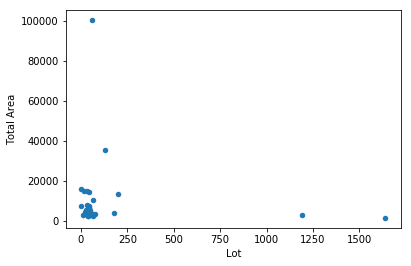

In [13]:
dhs_2c.plot(x="Lot", y="Total Area", kind="scatter")

Figure 1: Total Area against number of Lots in NYC City-owned sites that are available and potentially suitable for urban agriculture, including community gardens and urban farms. This dataset is created and maintained as per Local Law 46 of 2018. The two variable shows a cluster of sites with small number of Lots and less Total Area. One site has huge Total Area and small number of Lots while two sites has small Total Area and big number of Lots. 

### Use API and download a json file

In [14]:
url = "https://data.cityofnewyork.us/resource/4432-37z3.json"

In [15]:
df = pd.read_json(url)

In [16]:
df.head(3)

,address,agency,bin,block,borough,community_board,coordinates,council_district,date_created,latitude,longitude,lot,nta,parcel_name,postcode,potential_urban_ag,total_area
0,5 AVENUE,DCAS,NaN,3916,4,407,0/0,19.0,2017-11-02T00:00:00.000,NaN,NaN,35,NaN,NaN,NaN,Potentially Suitable 3 - Site has specific ins...,15000
1,63 ROAD,DCAS,NaN,6391,4,407,0/0,24.0,2017-11-02T00:00:00.000,NaN,NaN,24,NaN,NaN,NaN,Potentially Suitable 3 - Site has specific ins...,4700
2,DAVENPORT COURT,DCAS,NaN,14246,4,410,0/0,32.0,2017-11-02T00:00:00.000,NaN,NaN,1189,NaN,HAMILTON BEACH FIRE DEPT ACCES,NaN,Potentially Suitable 3 - Site has specific ins...,3200


In [17]:
df.columns

Index(['address', 'agency', 'bin', 'block', 'borough', 'community_board',
       'coordinates', 'council_district', 'date_created', 'latitude',
       'longitude', 'lot', 'nta', 'parcel_name', 'postcode',
       'potential_urban_ag', 'total_area'],
      dtype='object')

In [18]:
df_3c = df[['address','lot','total_area']]

In [19]:
df_3c.rename(columns = {'address':'Address', 
               'lot':'Lot', 
               'total_area': 'Total Area'}, inplace=True)

print(df_3c.Address[0])

5 AVENUE


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


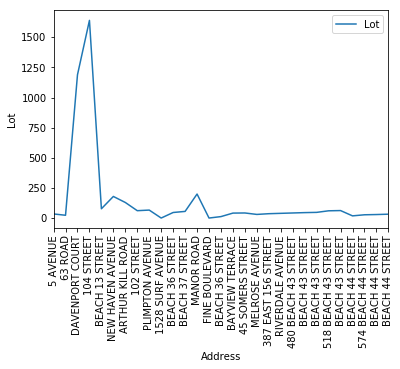

In [20]:
ax = df_3c.plot(x='Address', y='Lot', rot=90, xticks=[i for i in range(len(df_3c.Address))])
ax.set_ylabel("Lot");

Figure 2: number of Lots at their address of NYC City-owned sites that are available and potentially suitable for urban agriculture. 

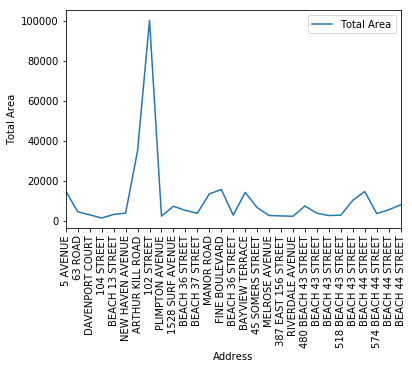

In [21]:
ax = df_3c.plot(x='Address', y='Total Area', rot=90, xticks=[i for i in range(len(df_3c.Address))])
ax.set_ylabel("Total Area");

Figure 3: Total Area at their address of NYC City-owned sites that are available and potentially suitable for urban agriculture. 